<img src="https://www.mca.org.uk/wp-content/uploads/sites/60/2020/01/Carnall-Farrar-Inspiring-change.png" style="float: left; margin: 20px; height: 55px">

# Hands on with Pandas

---

### Learning Objectives

**After this section, you will be able to:**
- Load in data from excel or csv files into a pandas dataframe
- Understand your data in a few lines of code
- Filtering, sorting and renaming data
- Handling missing data
- Easy pivot tables
- Downloading a pandas dataframe to excel


In [2]:
# Load Pandas into Python
import pandas as pd

<a id="reading-files"></a>
### Reading Files, Selecting Columns, and Summarizing

In [6]:
df = pd.read_csv('/Users/jackpickard/Downloads/referrals_oct19_dec20.csv')
df

,week_start,ccg_code,specialty,priority,referrals
0,2019-10-07,00L,(blank),Routine,13
1,2019-10-07,00L,(blank),Urgent,1
2,2019-10-07,00L,2WW,2 Week Wait,349
3,2019-10-07,00L,Allergy,Routine,3
4,2019-10-07,00L,Cardiology,Routine,84
...,...,...,...,...,...
592679,2020-12-21,99M,Surgery - Not Otherwise Specified,Urgent,2
592680,2020-12-21,99M,Surgery - Vascular,Routine,2
592681,2020-12-21,99M,Surgery - Vascular,Urgent,2
592682,2020-12-21,99M,Urology,Routine,25


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 592684 entries, 0 to 592683
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   week_start  592684 non-null  object
 1   ccg_code    592684 non-null  object
 2   specialty   592684 non-null  object
 3   priority    592684 non-null  object
 4   referrals   592684 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 22.6+ MB


**Examine the users data.**

In [ ]:
type(df)             # check its type

In [ ]:
type(df['week_start'])

In [11]:
df                   # Print the first 30 and last 30 rows.

,week_start,ccg_code,specialty,priority,referrals
0,2019-10-07,00L,(blank),Routine,13
1,2019-10-07,00L,(blank),Urgent,1
2,2019-10-07,00L,2WW,2 Week Wait,349
3,2019-10-07,00L,Allergy,Routine,3
4,2019-10-07,00L,Cardiology,Routine,84
...,...,...,...,...,...
592679,2020-12-21,99M,Surgery - Not Otherwise Specified,Urgent,2
592680,2020-12-21,99M,Surgery - Vascular,Routine,2
592681,2020-12-21,99M,Surgery - Vascular,Urgent,2
592682,2020-12-21,99M,Urology,Routine,25


In [14]:
df.head()            # Print the first five rows.

,week_start,ccg_code,specialty,priority,referrals
0,2019-10-07,00L,(blank),Routine,13
1,2019-10-07,00L,(blank),Urgent,1
2,2019-10-07,00L,2WW,2 Week Wait,349
3,2019-10-07,00L,Allergy,Routine,3
4,2019-10-07,00L,Cardiology,Routine,84


In [ ]:
df.head(10)          # Print the first 10 rows.

In [ ]:
df.tail()            # Print the last five rows.

Sample is a useful one

In [ ]:
df.sample(5).transpose()

In [ ]:
# The row index (aka "the row labels" — in this case integers)
df.index            

In [ ]:
# Column names (which is "an index")
df.columns

In [ ]:
# Datatypes of each column — each column is stored as an 
# ndarray, which has a datatype
df.dtypes

In [ ]:
# Number of rows and columns
df.shape

In [ ]:
# All values as a NumPy array
df.values

In [ ]:
# Concise summary (including memory usage) — 
# useful to quickly see if nulls exist
df.info()

** Select or index data.**<br>
Pandas `DataFrame`s have structural similarities with Python-style lists and dictionaries.  
In the example below, we select a column of data using the name of the column in a similar manner to how we select a dictionary value with the dictionary key.

##

In [ ]:
# Select a column
# df['priority']
df.priority

**Summarize (describe) the data.**<br>
Pandas has a bunch of built-in methods to quickly summarize your data and provide you with a quick general understanding.

In [ ]:
# Describe all numeric columns.
df.describe()

In [ ]:
# Describe all columns, including non-numeric.
df.describe(include='all')

In [ ]:
# Describe a single column — recall that "users.occupation" 
# refers to a Series.
df["referrals"].describe()

In [ ]:
# Calculate the mean of the ages.
df["referrals"].mean()

**Count the number of occurrences of each value.**

In [ ]:
df["specialty"].value_counts()     # Most useful for categorical variables

<a id="filtering-and-sorting"></a>
### Filtering and Sorting
- **Objective:** Filter and sort data using Pandas.

We can use simple operator comparisons on columns to extract relevant or drop irrelevant information.

In [17]:
ccg_00L = df.loc[df["ccg_code"] == '00L']

In [20]:
# Create a Series of Booleans…
# In Pandas, this comparison is performed element-wise 
# on each row of data.
ccg_bool = df["ccg_code"] == '00L'
ccg_bool

0          True
1          True
2          True
3          True
4          True
          ...  
592679    False
592680    False
592681    False
592682    False
592683    False
Name: ccg_code, Length: 592684, dtype: bool

In [21]:
# …and use that Series to filter rows.
# In Pandas, indexing a DataFrame by a Series of Booleans 
# only selects rows that are True in the Boolean.

df[ccg_bool]

,week_start,ccg_code,specialty,priority,referrals
0,2019-10-07,00L,(blank),Routine,13
1,2019-10-07,00L,(blank),Urgent,1
2,2019-10-07,00L,2WW,2 Week Wait,349
3,2019-10-07,00L,Allergy,Routine,3
4,2019-10-07,00L,Cardiology,Routine,84
...,...,...,...,...,...
584662,2020-12-21,00L,Surgery - Plastic,Urgent,1
584663,2020-12-21,00L,Surgery - Vascular,Routine,19
584664,2020-12-21,00L,Surgery - Vascular,Urgent,4
584665,2020-12-21,00L,Urology,Routine,25


In [22]:
# Or, combine into a single step.
two_week_wait = df[df.specialty == '2WW']
two_week_wait

,week_start,ccg_code,specialty,priority,referrals
2,2019-10-07,00L,2WW,2 Week Wait,349
61,2019-10-07,00N,2WW,2 Week Wait,180
113,2019-10-07,00P,2WW,2 Week Wait,284
169,2019-10-07,00Q,2WW,2 Week Wait,122
226,2019-10-07,00R,2WW,2 Week Wait,170
...,...,...,...,...,...
592413,2020-12-21,99C,2WW,2 Week Wait,151
592463,2020-12-21,99E,2WW,2 Week Wait,208
592520,2020-12-21,99F,2WW,2 Week Wait,127
592574,2020-12-21,99G,2WW,2 Week Wait,113


The syntax is:

`my_dataframe.loc[<filter_condition>, <column>] = <new_value>`

### The .loc and .iloc head scratcher
These are a little difficult to get your head around - I think of it like the eye of Sauron 

You can turn your gaze to any part of the dataset in one easy phrase

`.iloc` is probably easier to get your head around

In [36]:
df.iloc[100:,0:]

,week_start,ccg_code,specialty,priority,referrals
100,2019-10-07,00N,Rheumatology,Routine,20
101,2019-10-07,00N,Rheumatology,Urgent,3
102,2019-10-07,00N,Sleep Medicine,Routine,3
103,2019-10-07,00N,Surgery - Breast,2 Week Wait,9
104,2019-10-07,00N,Surgery - Breast,Routine,4
...,...,...,...,...,...
592679,2020-12-21,99M,Surgery - Not Otherwise Specified,Urgent,2
592680,2020-12-21,99M,Surgery - Vascular,Routine,2
592681,2020-12-21,99M,Surgery - Vascular,Urgent,2
592682,2020-12-21,99M,Urology,Routine,25


`.loc`  is best practice for filtering on a column

In [ ]:
df.loc[df.priority == 'Routine']

`.loc` is also useful if you want to filter **both** rows and columns at the same time

In [ ]:
# Select one or more column from the filtered results.
df.loc[df.ccg_code == '00L', ["week_start", 'referrals']]

**Sorting**

In [ ]:
# Sort a Series.
df["referrals"].sort_values(ascending=False)

## Exercise

* Create a new table called 'cardiology', that only includes cardiology specialty
* Calculate the average referrals in cardiology between 2020-06-01 and 2020-06-30
* sort the data by ascending date

<a id="columns"></a>
### Renaming, Adding, and Removing Columns

- **Objective:** Manipulate `DataFrame` columns.

In [ ]:
df.sample()

In [ ]:
# Rename one or more columns in a single output using value mapping.
df.rename(columns={'week_start':'hello_there', 'referrals':'some_other_metric'})

In [ ]:
# Replace all column names using a list of matching length
cols = ['week_start', 'ccg_code', 'specialty', 'priority', 'referrals'] 

# Replace after file has already been read into Python.
df.columns = drink_cols

df.head()

**Removing Columns**

In [39]:
# axis=0 for rows, 1 for columns
df.drop('week_start', axis=1)

,ccg_code,specialty,priority,referrals
0,00L,(blank),Routine,13
1,00L,(blank),Urgent,1
2,00L,2WW,2 Week Wait,349
3,00L,Allergy,Routine,3
4,00L,Cardiology,Routine,84
...,...,...,...,...
592679,99M,Surgery - Not Otherwise Specified,Urgent,2
592680,99M,Surgery - Vascular,Routine,2
592681,99M,Surgery - Vascular,Urgent,2
592682,99M,Urology,Routine,25


In [ ]:
df.head()

#### **Handling missing data**

In [ ]:
# Missing values are usually excluded in calculations by default.
df["ccg_code"].value_counts()              
# Excludes missing values in the calculation

In [ ]:
# Includes missing values
df["ccg_code"].value_counts(dropna=False)

In [ ]:
# Find missing values in a Series.
# True if missing, False if not missing
df["referrals"].isnull()

In [ ]:
# Count the missing values — sum() works because True is 1 and False is 0.
df["referrals"].isnull().sum()

In [ ]:
# Only show rows where referrals is not missing.
df["referrals"].isnull().notnull()]

**Dropping Missing Values**

In [ ]:
# Drop a row if ANY values are missing from any column — can be dangerous!
drinks.dropna()

In [ ]:
# Drop a row only if ALL values are missing.
drinks.dropna(how='all')

### An easy pivot table
https://pandas.pydata.org/docs/reference/api/pandas.pivot_table.html

In [3]:
df.sample()

,week_start,ccg_code,specialty,priority,referrals
84822,2019-11-25,07G,Surgery - Vascular,Routine,7


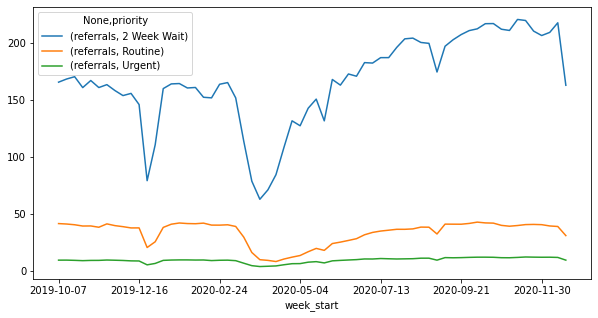

In [21]:
vals = ['referrals']
idx=['week_start']
cols=['priority']

pd.pivot_table(df,values=vals,index=idx,columns=cols).plot(figsize=(10,5))

### Downloading to excel or csv

In [14]:
two_week_wait.to_csv('/Users/jackpickard/Downloads/a_cool_download.csv')

### Exercise 2

* Create a new table called iow_ccg which contains only data from Isle of Wight CCG ('10L')
* Remove rows where specialty is '(blank)' // TIP: use != 
* Create a pivot table summing referrals where the index is week_start and columns are specialty
* Download the pivot table as a csv file to your downloads folder (or anywhere you want)